In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from google.colab import drive

In [7]:
# Mount Google Drive ke Colab
drive.mount('/content/drive')

# Path file Excel di Google Drive
file_path = '/content/drive/My Drive/Afl.xlsx'
# Membaca file Excel
data = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama
print(data.head())


Mounted at /content/drive
      GameId  Year Round        Date  MaxTemp  MinTemp  Rainfall  \
0  2012R0101  2012    R1  2012-03-24     24.0     12.2       0.0   
1  2012R0102  2012    R1  2012-03-29     25.7      9.7       0.0   
2  2012R0103  2012    R1  2012-03-30     27.4      9.7       0.0   
3  2012R0104  2012    R1  2012-03-31     29.1     15.1       0.6   
4  2012R0105  2012    R1  2012-03-31     28.2     19.7       0.0   

               Venue StartTime  Attendance  ... HomeTeamScoreHT  \
0  Stadium Australia   7:20 PM      38.203  ...             3.3   
1             M.C.G.   7:45 PM      78.285  ...             5.6   
2             M.C.G.   7:50 PM      78.466  ...            10.6   
3             M.C.G.   1:45 PM      33.473  ...             7.4   
4            Carrara   3:45 PM      12.790  ...             5.3   

   HomeTeamScore3QT  HomeTeamScoreFT  HomeTeamScore        AwayTeam  \
0               3.4             5.70             37          Sydney   
1              10.7 

In [8]:
# Menampilkan deskripsi statistik dari data numerik
print(data.describe())

              Year      MaxTemp      MinTemp     Rainfall   Attendance  \
count  2447.000000  2440.000000  2440.000000  2425.000000  2447.000000   
mean   2017.475276    19.139385     9.783443     2.222144    34.928665   
std       3.477780     5.009624     4.525184     6.549087    44.428910   
min    2012.000000     8.700000    -5.400000     0.000000     0.000000   
25%    2014.000000    15.100000     6.800000     0.000000    17.695000   
50%    2017.000000    18.500000     9.400000     0.000000    30.422000   
75%    2021.000000    22.700000    12.700000     1.600000    41.782000   
max    2023.000000    37.600000    25.000000   114.400000   750.000000   

       HomeTeamScoreQT  HomeTeamScoreHT  HomeTeamScore3QT  HomeTeamScoreFT  \
count      2447.000000      2447.000000       2447.000000      2447.000000   
mean          3.436167         6.736036          9.935092        12.992395   
std           1.788725         2.693548          3.523300         4.344379   
min           0.00000

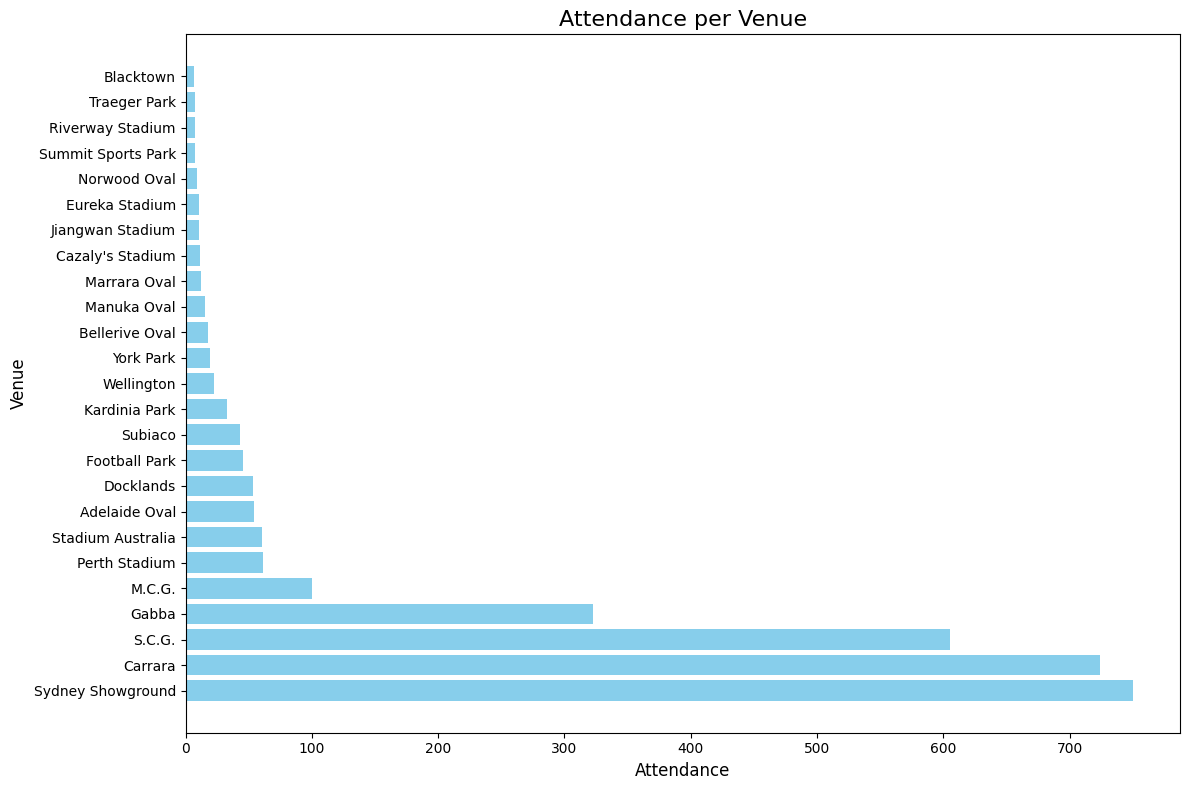

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Kolom yang digunakan
venue_column = 'Venue'
attendance_column = 'Attendance'

# Memastikan bahwa kolom yang dibutuhkan ada di data
if venue_column in data.columns and attendance_column in data.columns:
    # Mengurutkan data berdasarkan Attendance dari yang terbesar ke terkecil
    sorted_data = data.sort_values(by=attendance_column, ascending=False)

    # Plot bar chart horizontal
    plt.figure(figsize=(12, 8))
    plt.barh(sorted_data[venue_column], sorted_data[attendance_column], color='skyblue')

    # Menambahkan judul dan label pada chart
    plt.title('Attendance per Venue', fontsize=16)
    plt.xlabel('Attendance', fontsize=12)
    plt.ylabel('Venue', fontsize=12)

    # Tampilkan chart
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{venue_column}' atau '{attendance_column}' tidak ditemukan dalam data.")


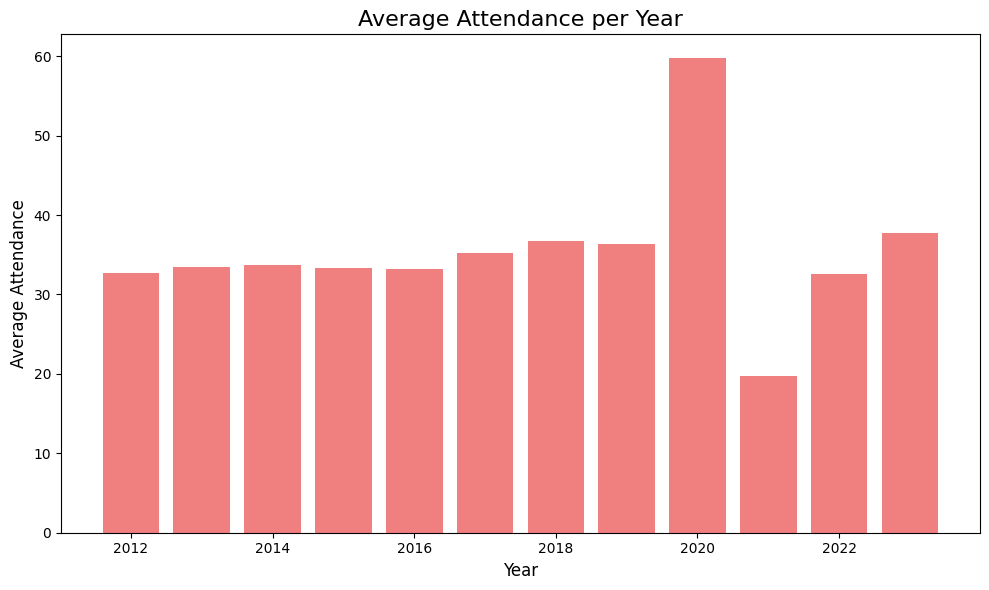

In [52]:
# Kolom yang digunakan
year_column = 'Year'
attendance_column = 'Attendance'

# Memastikan bahwa kolom yang dibutuhkan ada di data
if year_column in data.columns and attendance_column in data.columns:
    # Menghitung rata-rata kehadiran per tahun
    yearly_attendance = data.groupby(year_column)[attendance_column].mean().sort_index()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_attendance.index, yearly_attendance.values, color='lightcoral')

    # Menambahkan judul dan label pada chart
    plt.title('Average Attendance per Year', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Attendance', fontsize=12)

    # Tampilkan chart
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{year_column}' atau '{attendance_column}' tidak ditemukan dalam data.")


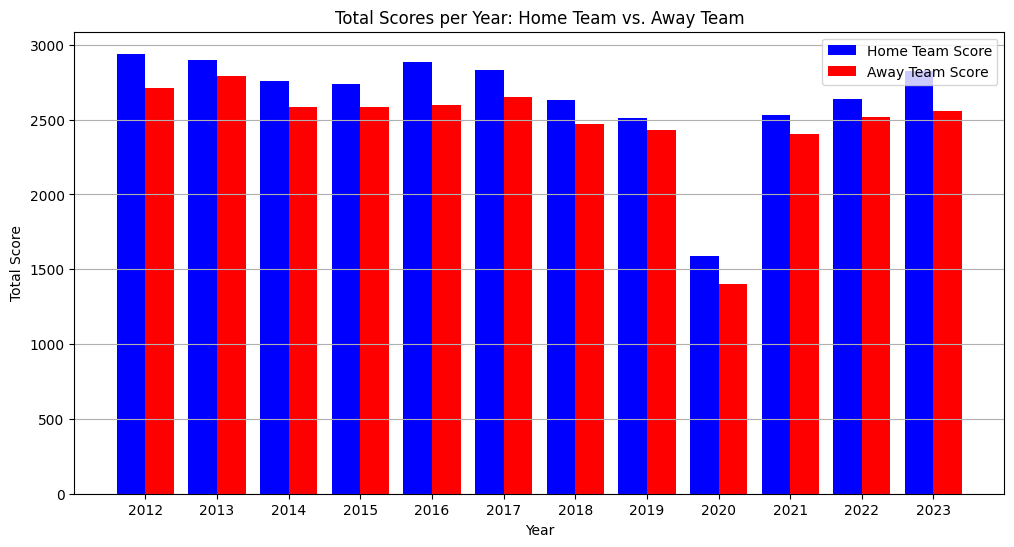

In [23]:
# Mengelompokkan data berdasarkan tahun dan menjumlahkan skor
score_totals = data.groupby('Year').agg({
    'HomeTeamScoreFT': 'sum',
    'AwayTeamScoreFT': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Histogram untuk Home Team Score
plt.bar(score_totals['Year'] - 0.2, score_totals['HomeTeamScoreFT'], width=0.4, label='Home Team Score', color='blue')

# Histogram untuk Away Team Score
plt.bar(score_totals['Year'] + 0.2, score_totals['AwayTeamScoreFT'], width=0.4, label='Away Team Score', color='red')

plt.xlabel('Year')
plt.ylabel('Total Score')
plt.title('Total Scores per Year: Home Team vs. Away Team')
plt.xticks(score_totals['Year'])
plt.legend()
plt.grid(axis='y')

plt.show()


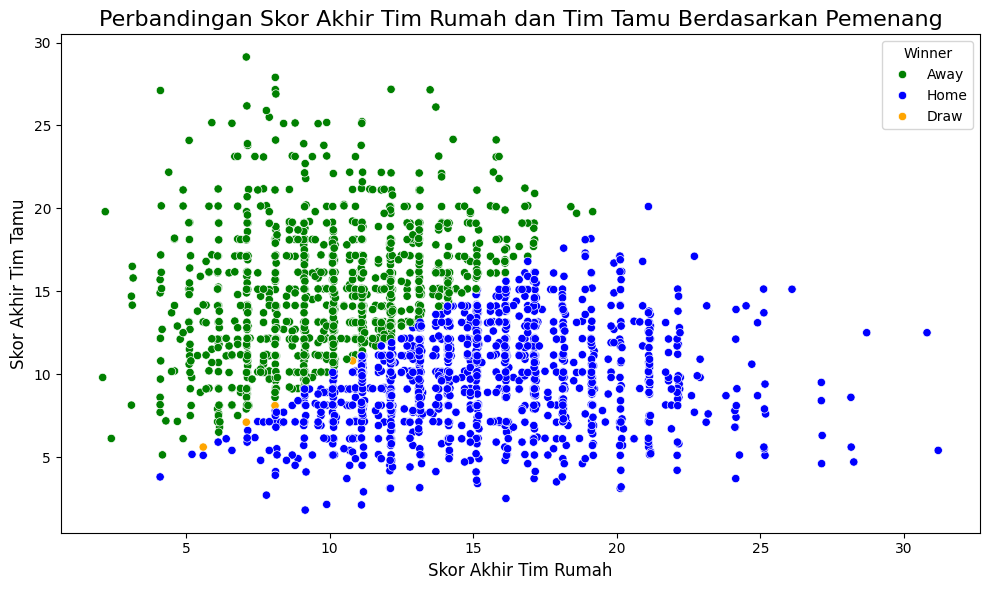

In [41]:
# Kolom yang digunakan
home_team_score_column = 'HomeTeamScoreFT'
away_team_score_column = 'AwayTeamScoreFT'

# Memastikan bahwa kolom yang dibutuhkan ada di data
if home_team_score_column in data.columns and away_team_score_column in data.columns:
    # Jika Anda memiliki kolom yang bisa digunakan untuk pewarnaan, misalnya 'Winner'
    # Misalnya kita buat kolom dummy 'Winner' berdasarkan skor
    data['Winner'] = data.apply(lambda row: 'Home' if row[home_team_score_column] > row[away_team_score_column] else
                                       ('Away' if row[home_team_score_column] < row[away_team_score_column] else 'Draw'), axis=1)

    # Plot scatter plot menggunakan Seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[home_team_score_column], y=data[away_team_score_column], hue=data['Winner'], palette={'Home': 'blue', 'Away': 'green', 'Draw': 'orange'})

    # Menambahkan judul dan label pada chart
    plt.title('Perbandingan Skor Akhir Tim Rumah dan Tim Tamu Berdasarkan Pemenang', fontsize=16)
    plt.xlabel('Skor Akhir Tim Rumah', fontsize=12)
    plt.ylabel('Skor Akhir Tim Tamu', fontsize=12)

    # Tampilkan chart
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{home_team_score_column}' atau '{away_team_score_column}' tidak ditemukan dalam data.")


<ipython-input-62-9e6fbc58097b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_wins.index, y=total_wins.values, palette='viridis')


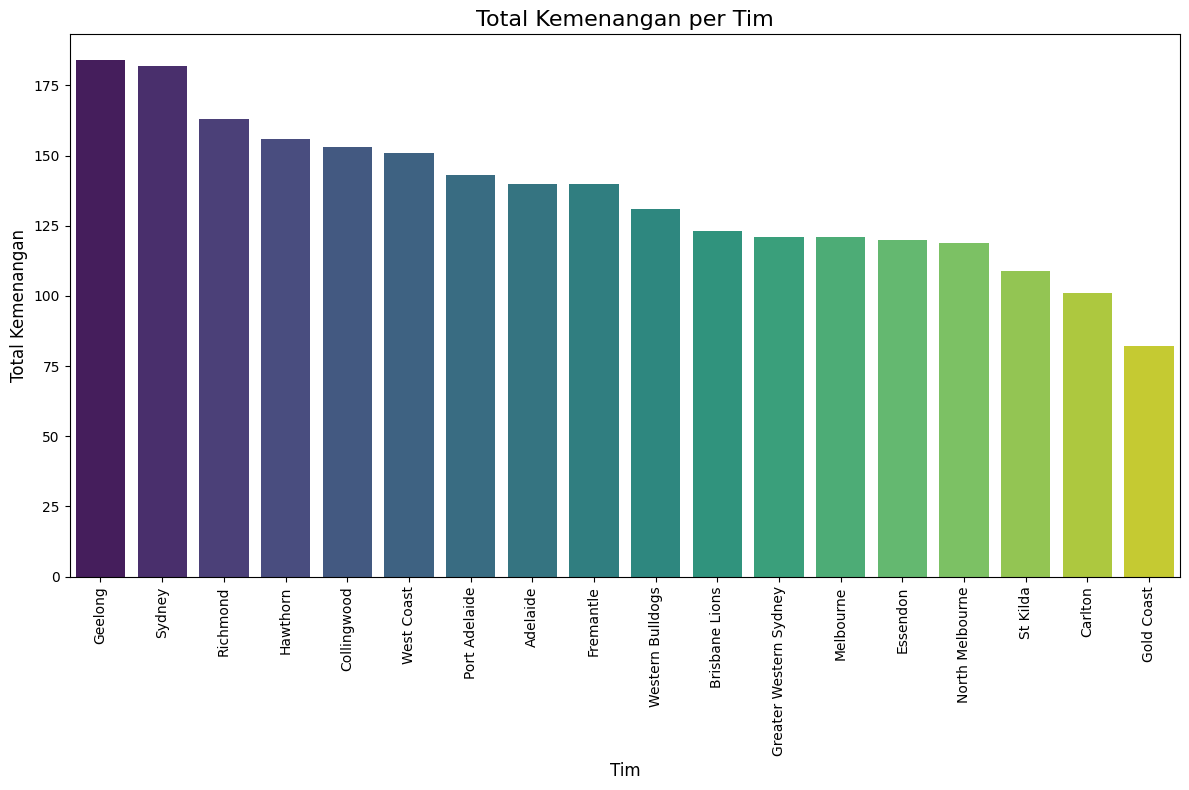

In [62]:
# Kolom yang digunakan
home_team_score_column = 'HomeTeamScoreFT'
away_team_score_column = 'AwayTeamScoreFT'
home_team_column = 'HomeTeam'
away_team_column = 'AwayTeam'

# Memastikan bahwa kolom yang dibutuhkan ada di data
if home_team_score_column in data.columns and away_team_score_column in data.columns:
    # Menentukan pemenang
    data['Winner'] = data.apply(
        lambda row: row[home_team_column] if row[home_team_score_column] > row[away_team_score_column]
        else (row[away_team_column] if row[home_team_score_column] < row[away_team_score_column]
              else 'Draw'), axis=1
    )

    # Menghitung kemenangan per tim
    home_wins = data[data['Winner'] == data[home_team_column]].groupby(home_team_column).size()
    away_wins = data[data['Winner'] == data[away_team_column]].groupby(away_team_column).size()

    # Menggabungkan hasil kemenangan
    total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

    # Plot bar chart total kemenangan per tim
    plt.figure(figsize=(12, 8))
    sns.barplot(x=total_wins.index, y=total_wins.values, palette='viridis')

    # Menambahkan judul dan label pada chart
    plt.title('Total Kemenangan per Tim', fontsize=16)
    plt.xlabel('Tim', fontsize=12)
    plt.ylabel('Total Kemenangan', fontsize=12)

    # Rotate x-tick labels jika nama tim terlalu panjang
    plt.xticks(rotation=90)

    # Tampilkan chart
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{home_team_score_column}', '{away_team_score_column}', '{home_team_column}', atau '{away_team_column}' tidak ditemukan dalam data.")


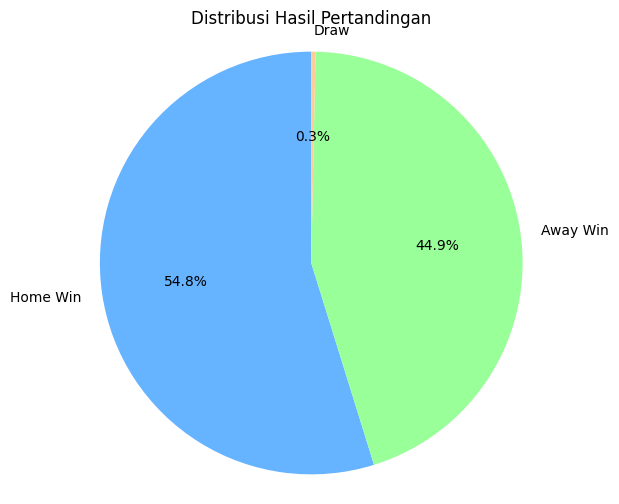

In [29]:
# Membuat kategori berdasarkan hasil pertandingan
def determine_match_result(row):
    if row['HomeTeamScoreFT'] > row['AwayTeamScoreFT']:
        return 'Home Win'
    elif row['HomeTeamScoreFT'] < row['AwayTeamScoreFT']:
        return 'Away Win'
    else:
        return 'Draw'

# Terapkan fungsi untuk menentukan hasil
data['MatchResult'] = data.apply(determine_match_result, axis=1)

# Hitung proporsi dari setiap kategori hasil pertandingan
result_counts = data['MatchResult'].value_counts()

# Membuat pie chart untuk menampilkan distribusi
plt.figure(figsize=(6,6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Hasil Pertandingan')
plt.axis('equal')
plt.show()


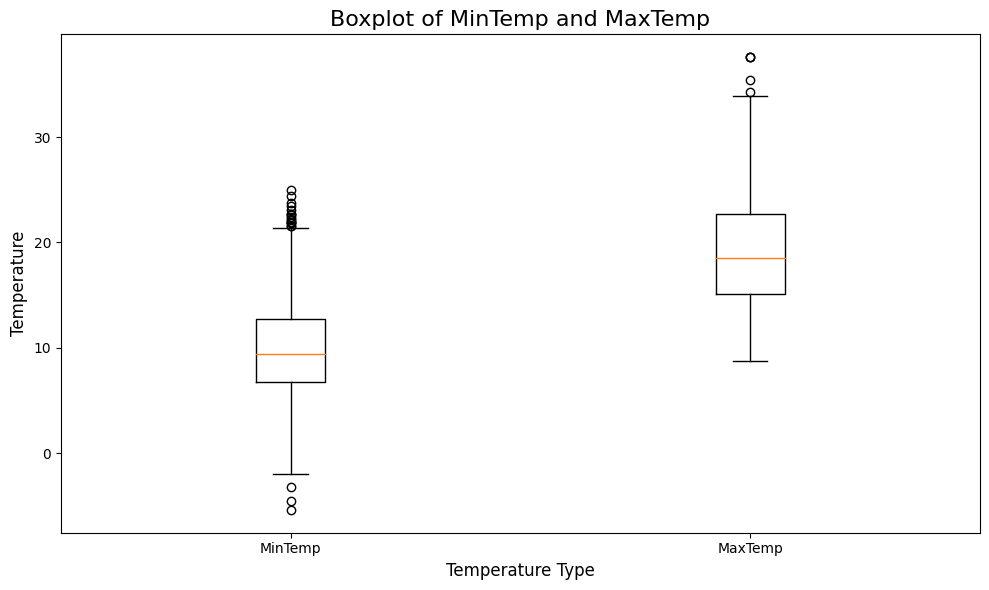

In [36]:
# Kolom yang digunakan
min_temp_column = 'MinTemp'
max_temp_column = 'MaxTemp'

# Memastikan bahwa kolom yang dibutuhkan ada di data
if min_temp_column in data.columns and max_temp_column in data.columns:
    # Data untuk boxplot
    temp_data = data[[min_temp_column, max_temp_column]]

    # Plot boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot([temp_data[min_temp_column].dropna(), temp_data[max_temp_column].dropna()],
                labels=[min_temp_column, max_temp_column])

    # Menambahkan judul dan label pada chart
    plt.title('Boxplot of MinTemp and MaxTemp', fontsize=16)
    plt.xlabel('Temperature Type', fontsize=12)
    plt.ylabel('Temperature', fontsize=12)

    # Tampilkan chart
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{min_temp_column}' atau '{max_temp_column}' tidak ditemukan dalam data.")


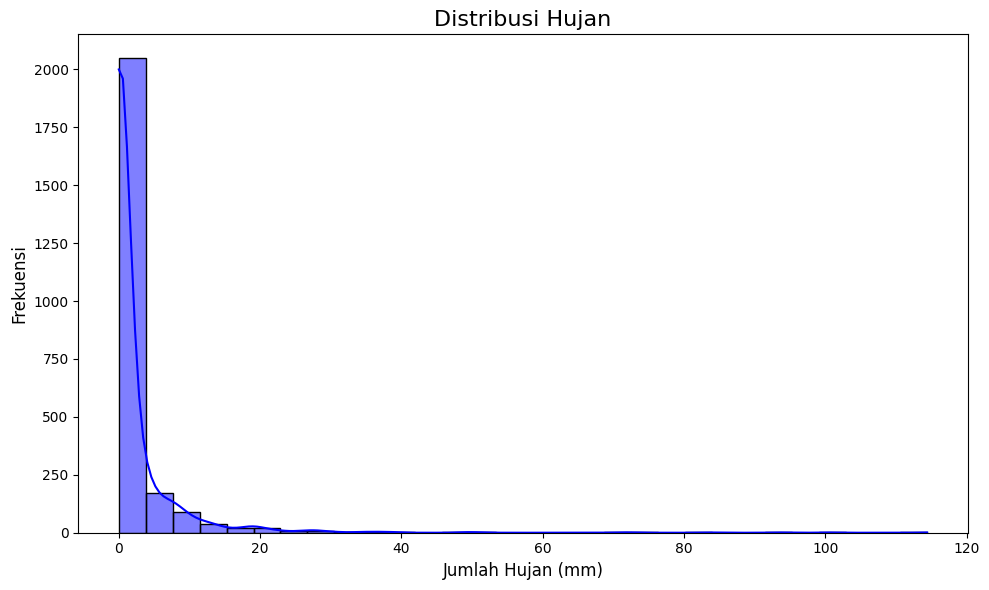

In [71]:
# Kolom yang digunakan
rainfall_column = 'Rainfall'

# Memastikan bahwa kolom yang dibutuhkan ada di data
if rainfall_column in data.columns:
    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data[rainfall_column], bins=30, kde=True, color='blue')

    # Menambahkan judul dan label pada chart
    plt.title('Distribusi Hujan', fontsize=16)
    plt.xlabel('Jumlah Hujan (mm)', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

    # Tampilkan chart
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{rainfall_column}' tidak ditemukan dalam data.")
